In [15]:
import os
import yaml
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
config_path = os.path.join("..", "..", "..", "..", "configs", "lab3", "config.yaml")
with open(config_path, "r") as file:
    config = yaml.safe_load(file)
video_path = os.path.join("..", "..", "..", "..", "assets", "mazeweek1.mp4")
output_path = os.path.join("..", "..", "..", "..", "assets", "mazeweek1_frames")

In [31]:
def display_features(image_path, keypoints):
    """
    Display the positions of keypoints on the image.

    Args:
        image_path (str): Path to the input image.
        keypoints (ndarray): Array of keypoints, with each row as (x, y, scale, orientation).
    """
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib

    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis("off")

    # Extract (x, y) coordinates from keypoints
    x_coords = keypoints[:, 0]  # X-coordinates
    y_coords = keypoints[:, 1]  # Y-coordinates

    # Overlay keypoints
    plt.scatter(x_coords, y_coords, c="red", s=10, label="Keypoints")

    # Display with a legend
    plt.legend()
    plt.title("Feature Keypoints")
    plt.show()

In [32]:
def parse_sift_file(file_path):
    """
    Parses a VisualSFM .sift file based on the specified format.

    Args:
        file_path (str): Path to the .sift file.

    Returns:
        keypoints (np.ndarray): n x 5 matrix of [x, y, color, scale, orientation].
        descriptors (np.ndarray): n x 128 matrix of feature descriptors.
    """
    with open(file_path, "rb") as f:
        # Step 1: Read header (5 integers)
        header = np.fromfile(f, dtype=np.int32, count=5)
        name, version, npoint, dim_loc, dim_desc = header

        # Verify the header
        if name != (ord("S") + (ord("I") << 8) + (ord("F") << 16) + (ord("T") << 24)):
            raise ValueError("Invalid SIFT file: Incorrect name in header")
        if version not in [
            (ord("V") + (ord("4") << 8) + (ord(".") << 16) + (ord("0") << 24)),
            (ord("V") + (ord("5") << 8) + (ord(".") << 16) + (ord("0") << 24)),
        ]:
            raise ValueError("Unsupported SIFT version")
        if dim_loc != 5:
            raise ValueError(f"Unexpected dimension for location data: {dim_loc}")
        if dim_desc != 128:
            raise ValueError(f"Unexpected dimension for descriptors: {dim_desc}")

        # Step 2: Read location data (npoint x 5 float matrix)
        keypoints = np.fromfile(f, dtype=np.float32, count=npoint * dim_loc)
        keypoints = keypoints.reshape((npoint, dim_loc))

        # Step 3: Read descriptor data (npoint x 128 unsigned char matrix)
        descriptors = np.fromfile(f, dtype=np.uint8, count=npoint * dim_desc)
        descriptors = descriptors.reshape((npoint, dim_desc)).astype(np.float32)

        # Normalize descriptors (to match VisualSFM's 512 normalization)
        descriptors /= 512.0

        # Step 4: Verify EOF marker
        eof_marker = np.fromfile(f, dtype=np.int32, count=1)
        expected_eof = 0xFF + (ord("E") << 8) + (ord("O") << 16) + (ord("F") << 24)
        if eof_marker.size == 0 or eof_marker[0] != expected_eof:
            raise ValueError("Invalid SIFT file: Missing or incorrect EOF marker")

        return keypoints, descriptors

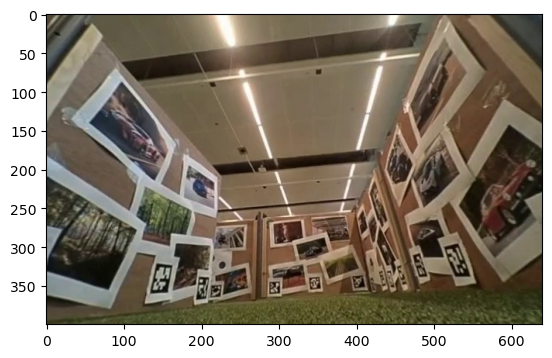

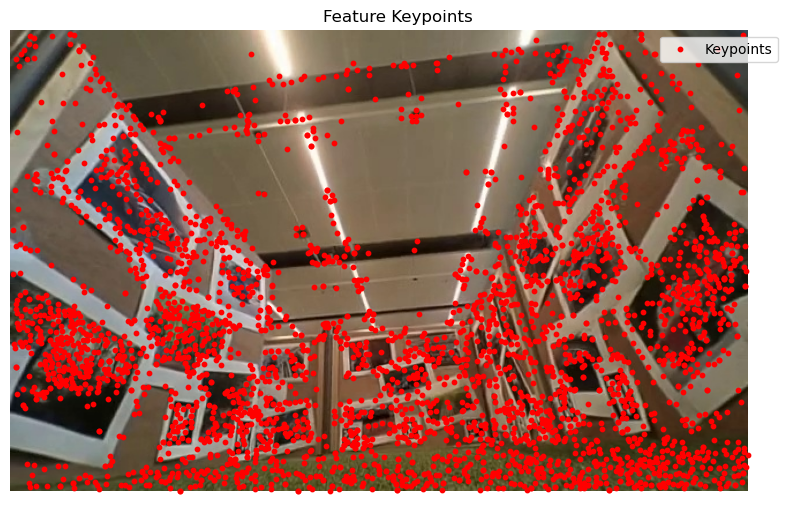

Number of keypoints: 3433
Descriptors shape: (3433, 128)


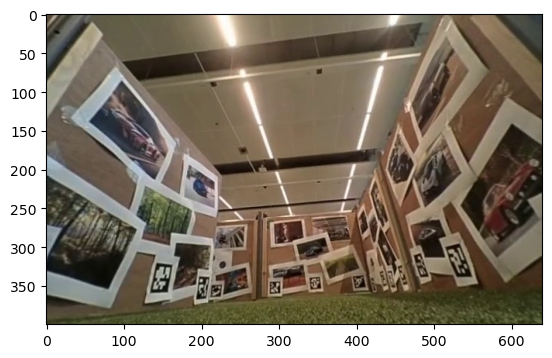

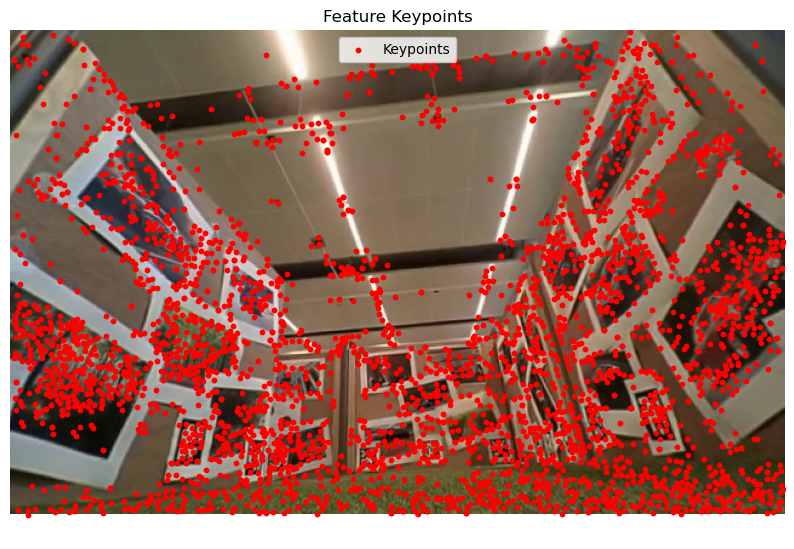

Number of keypoints: 3382
Descriptors shape: (3382, 128)


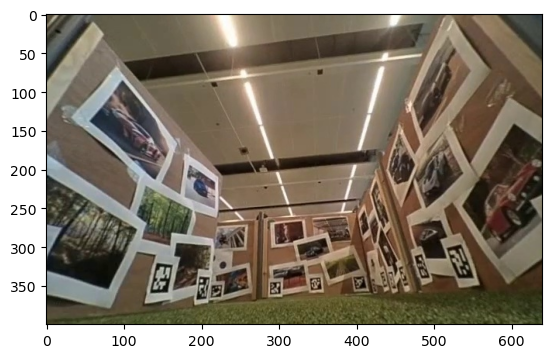

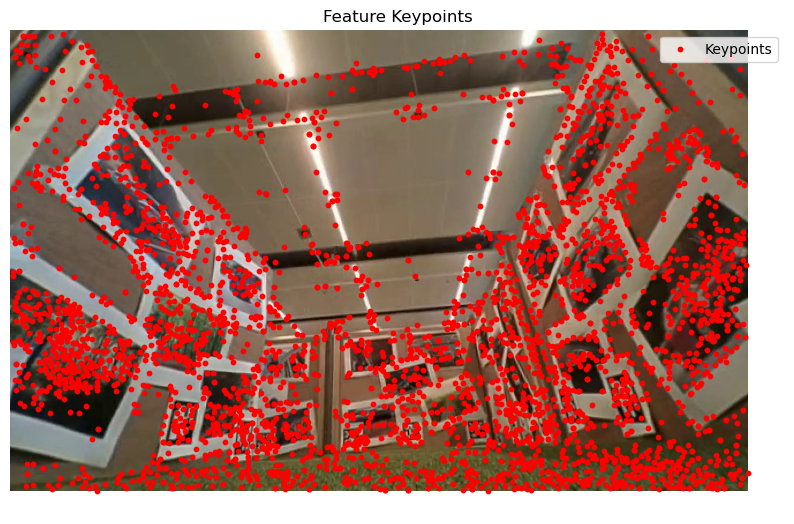

Number of keypoints: 3474
Descriptors shape: (3474, 128)


In [33]:
for i in range(20, 23):
    img = mpimg.imread(f"{output_path}/frame_{i:05d}.jpg")
    plt.imshow(img)
    plt.show()
    keypoints, descriptors = parse_sift_file(f"{output_path}/frame_{i:05d}.sift")
    display_features(f"{output_path}/frame_{i:05d}.jpg", keypoints)
    print(f"Number of keypoints: {len(keypoints)}")
    print(f"Descriptors shape: {descriptors.shape}")